In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# always useful
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn as sk
from scipy import linalg as la
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC

from scipy import fftpack

In [26]:
data_1 = pd.read_csv('data/01.csv', sep=',')
data_2 = pd.read_csv('data/02.csv', sep=',')
data_3 = pd.read_csv('data/03.csv', sep=',')
data_4 = pd.read_csv('data/04.csv', sep=',')
data_5 = pd.read_csv('data/05.csv', sep=',')
data_6 = pd.read_csv('data/06.csv', sep=',')
data_7 = pd.read_csv('data/07.csv', sep=',')
data_8 = pd.read_csv('data/08.csv', sep=',')
data_9 = pd.read_csv('data/09.csv', sep=',')
data_10 = pd.read_csv('data/10.csv', sep=',')
data_11 = pd.read_csv('data/11.csv', sep=',')
data_12 = pd.read_csv('data/12.csv', sep=',')
data_13 = pd.read_csv('data/13.csv', sep=',')
data_14 = pd.read_csv('data/14.csv', sep=',')
data_15 = pd.read_csv('data/15.csv', sep=',')
data_16 = pd.read_csv('data/16.csv', sep=',')
data_17 = pd.read_csv('data/17.csv', sep=',')
data_18 = pd.read_csv('data/18.csv', sep=',')
data_19 = pd.read_csv('data/19.csv', sep=',')
data_20 = pd.read_csv('data/20.csv', sep=',')

data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

df = pd.DataFrame()
df = df.append(data_1) 
df = df.append(data_2) 
df = df.append(data_3) 
df = df.append(data_4) 
df = df.append(data_5) 
df = df.append(data_6)
df = df.append(data_7)
df = df.append(data_8) 
df = df.append(data_9) 
df = df.append(data_10) 
df = df.append(data_11) 
df = df.append(data_12) 
df = df.append(data_13)
df = df.append(data_14) 
df = df.append(data_15) 
df = df.append(data_16) 
df = df.append(data_17) 
df = df.append(data_18) 
df = df.append(data_19)
df = df.append(data_20)


## Define functions for peak and throghs finding

In [27]:
def find_extrema(ts_array):
    
    # Find the first derivative of the time series array
    diff = np.diff(ts_array)

    # Find the sign of each element in the derivative array
    signs = np.sign(diff)

    # Find the indices where the sign of the derivative changes
    indices = np.where(np.diff(signs) != 0)[0] + 1

    # Check if the first or last element is an extremum
    if len(indices) == 0:
        if signs[0] == 1:
            indices = [0]
        elif signs[-1] == -1:
            indices = [len(ts_array) - 1]
    elif signs[0] == 1:
        indices = [0] + indices
    elif signs[-1] == -1:
        indices = indices + [len(ts_array) - 1]

    # Extract the extremum points from the time series array
    extrema_points = [ts_array[i] for i in indices]

    return indices, extrema_points

def find_indices(array, subarray):
    indices = []
    for i in range(len(array)):
        if array[i] in subarray:
            indices.append(i)
    return indices

def select_values(data):
    selected_values = []
    for i in range(1, len(data)):
        if abs(data[i] - data[i-1]) < 30:
            selected_values.append(data[i])
    return selected_values

def avg_adjacent_diff(lst):
    diffs = [lst[i+1] - lst[i] for i in range(len(lst)-1)]
    return sum(diffs) / len(diffs)

def timed_period(periodicity, point_type):
    
    if point_type == "x":
        m = min(plety)
    if point_type == "a":
        m = max(plety)
    indice = 0

    for index, i in enumerate(plety):
        if i == m:
            indice = index

    times_before = list(sorted(np.arange(indice, 0, -periodicity)))
    times_after = list(np.arange(indice, len(plety), periodicity))
    times = times_before + times_after

    return times

def plot_spectrum(ft_data1,ax):
        from matplotlib.colors import LogNorm
        # A logarithmic colormap
        ax.plot(np.abs(ft_data1))
        
def remove_indices_top(indices, values):
    indices_to_remove = []
    for i in range(len(indices) - 1):
        if abs(indices[i+1] - indices[i]) < 10:
            if values[i+1] < values[i]:
                indices_to_remove.append(i+1)
            else:
                indices_to_remove.append(i)

    index_array = [elem for i, elem in enumerate(indices) if i not in indices_to_remove]
    value_array = [elem for i, elem in enumerate(values) if i not in indices_to_remove]
    
    return index_array, value_array

def remove_indices_bottom(indices, values):
    indices_to_remove = []
    for i in range(len(indices) - 1):
        if abs(indices[i+1] - indices[i]) < 10:
            if values[i+1] < values[i]:
                indices_to_remove.append(i)
            else:
                indices_to_remove.append(i+1)

    index_array = [elem for i, elem in enumerate(indices) if i not in indices_to_remove]
    value_array = [elem for i, elem in enumerate(values) if i not in indices_to_remove]
    
    return index_array, value_array

## Find the periods of each cycle


In [28]:
patient_id = 8
plety = df.loc[(df['Patient ID'] == patient_id)]['plety']
plety = plety/np.std(plety)

lower_bound = -0.8
upper_bound = 0.8
    
indices, extrema_points = find_extrema(plety)
extrema_points_sorted = sorted(extrema_points)

In [29]:
# initialize the alpha peaks
a_values = [i for i in extrema_points if i > upper_bound]
a_indices = find_indices(plety, a_values)

In [30]:
a_peak = 0

a_value = []
a_indice = []

for i in range(0,len(a_indices)-1):
    if a_indices[i+1]-a_indices[i] < 20:
        if a_peak < a_values[i]:
            a_peak = a_values[i]
            a_index = a_indices[i]
            a_value.append(a_peak)
            a_indice.append(a_index)
        else:
            pass
    else:
        a_value.append(a_values[i])
        a_indice.append(a_indices[i])

a = {"values": a_value, "indices": a_indice}

In [31]:
a_peaks_idx, a_peaks_val = remove_indices_top(a["indices"], a["values"])

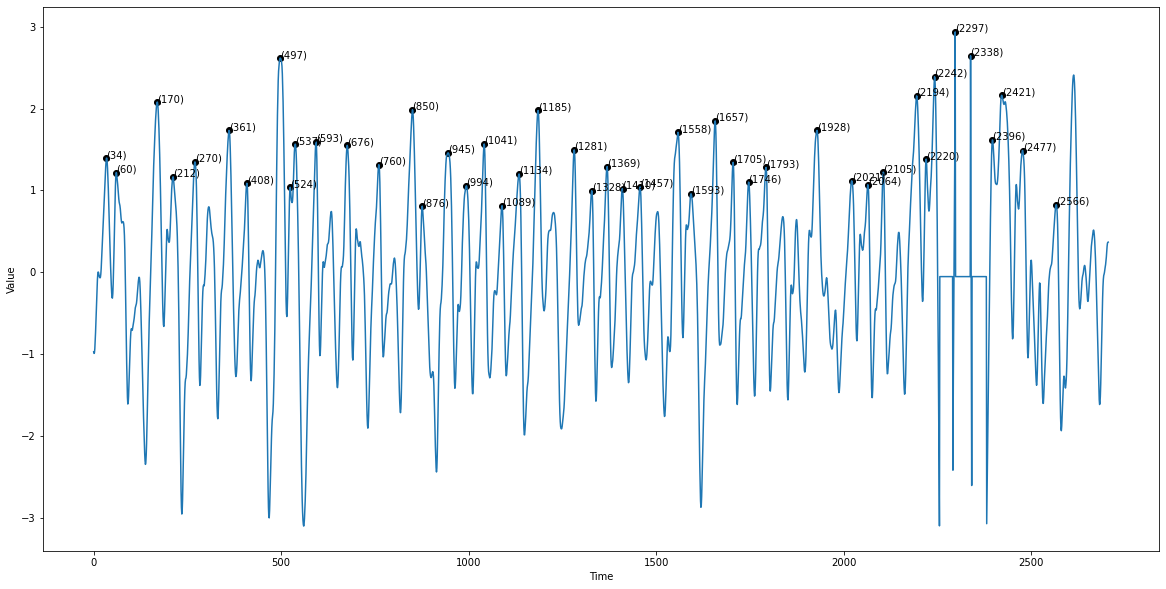

In [32]:
plt.figure(figsize=(20,10))

data = plety
# Plot the time series array
plt.plot(range(len(data)), data)

a_peak = []

# Plot the highlighted points in red
for i, value in enumerate(a_peaks_val):
    a_peak.append(a_peaks_idx[i])
    plt.scatter(a_peaks_idx[i], value, color='black')
    plt.text(a_peaks_idx[i], value, '({})'.format(a_peaks_idx[i]))

# Set the plot labels
plt.xlabel('Time')
plt.ylabel('Value')

# for point in times_after_x:
#     plt.axvline(x=point, color='red')


# Show the plot
plt.show()

## Modify array in case there is an error:

In [252]:
#remove wrong peak
a_peak.remove(116)

# append correct peak
#a_peak.append()

In [253]:
with open("peaks/a_peak_{}.txt".format(patient_id), "w") as output:
    output.write(str(a_peak))

# X_prime

In [259]:
lower_bound = -1
    
indices, extrema_points = find_extrema(plety)
extrema_points_sorted = sorted(extrema_points)

In [260]:
# initialize the alpha peaks
x_prime_values = [i for i in extrema_points if i < lower_bound]
x_prime_indices = find_indices(plety, x_prime_values)

In [261]:
x_prime_peak = 0

x_prime_value = []
x_prime_indice = []

for i in range(0,len(x_prime_indices)-1):
    if x_prime_indices[i+1]-x_prime_indices[i] < 10:
        if x_prime_peak < x_prime_values[i]:
            x_prime_peak = x_prime_values[i]
            x_prime_index = x_prime_indices[i]
            x_prime_value.append(x_prime_peak)
            x_prime_indice.append(x_prime_index)
        else:
            pass
    else:
        x_prime_value.append(x_prime_values[i])
        x_prime_indice.append(x_prime_indices[i])
        

x_prime = {"values": x_prime_value, "indices": x_prime_indice}

In [262]:
x_prime_peaks_idx, x_prime_peaks_val = remove_indices_bottom(x_prime["indices"], x_prime["values"])

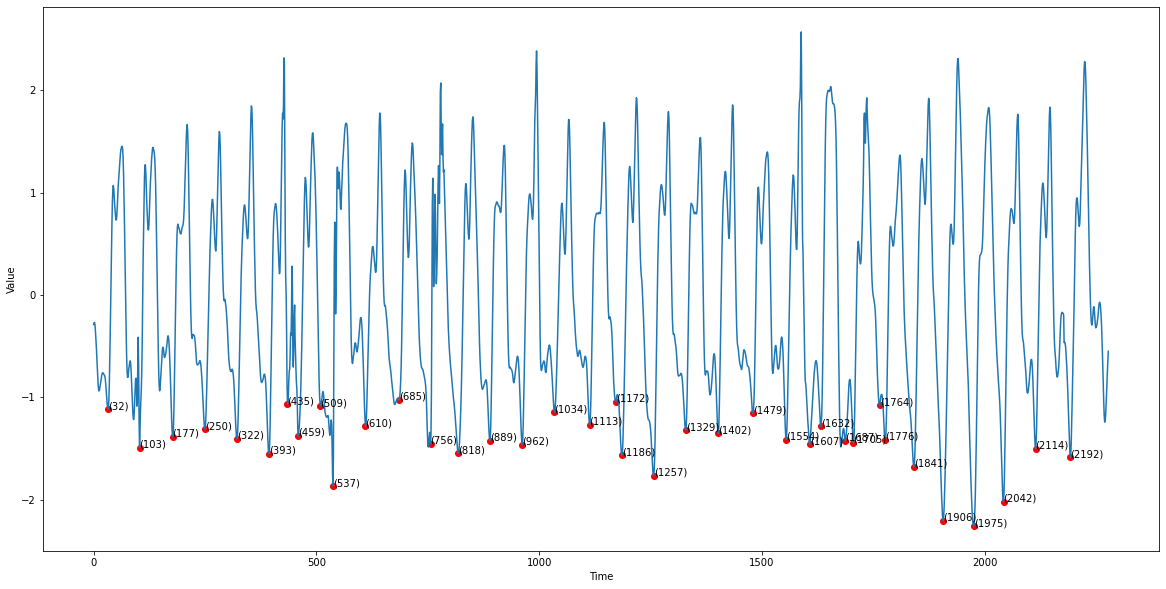

In [263]:
plt.figure(figsize=(20,10))

data = plety
# Plot the time series array
plt.plot(range(len(data)), data)

x_prime_peak = []

# Plot the highlighted points in red
for i, value in enumerate(x_prime_peaks_val):
    x_prime_peak.append(x_prime_peaks_idx[i])
    plt.scatter(x_prime_peaks_idx[i], value, color='red')
    plt.text(x_prime_peaks_idx[i], value, '({})'.format(x_prime_peaks_idx[i]))


# Set the plot labels
plt.xlabel('Time')
plt.ylabel('Value')

# for point in times_after_x:
#     plt.axvline(x=point, color='red')


# Show the plot
plt.show()

## Modify array in case there is an error:

In [268]:
#remove wrong peak
x_prime_peak.remove(1764)

# append correct peak
#a_peak.append()

In [269]:
with open("peaks/x_prime_peak_{}.txt".format(patient_id), "w") as output:
    output.write(str(x_prime_peak))